# Workflow:
1.Importing Libraries and Data(Data is fetched from Kaggle)

2.Data Lookup

3.Cleaning Data(Removing or Replacing Missing Values,Removing Duplicates)

4.Formatting Data(Formatting Object Values Correctly,Removing Unnecesary Columns)

5.Boxplots and Removing Outliers

6.Exploratory Data Analysis Pt1.Univariate

7.Exploratory Data Analysis Pt2.Multivariate(Correlations)

8.Feature Engineering and Data Proprecessing

9.Training ML Model

10.Evaluating the Model

# 1.Importing Libraries and Data(Data is fetched from Kaggle)

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
cp = pd.read_csv("Car details v3.csv")

# 2.Data Lookup

In [270]:
cp.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [271]:
cp.shape

(8128, 13)

In [272]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [273]:
cp.duplicated().any()

True

In [274]:
cp.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# 3.Cleaning the Data

In [275]:
cp = cp.drop_duplicates()

In [276]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [277]:
cp.dropna(axis=0, inplace=True)

In [278]:
cp.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# 4.Formatting the Data

In [279]:
cp['age'] = 2021 - cp['year']
cp.drop(['year'],axis = 1,inplace = True)
cp.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [280]:
cp['mileage'] = cp['mileage'].str.strip('kmpl').str.strip('km/kg')
cp['engine'] = cp['engine'].str.strip('CC')
cp['max_power'] = cp['max_power'].str.strip('bhp').str.strip()
cp.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [281]:
cp.info() # Mileage,engine and maxpower is still string so i will convert it to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   mileage        6717 non-null   object 
 8   engine         6717 non-null   object 
 9   max_power      6717 non-null   object 
 10  torque         6717 non-null   object 
 11  seats          6717 non-null   float64
 12  age            6717 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [282]:
cp['mileage'] = pd.to_numeric(cp['mileage'])
cp['engine'] = pd.to_numeric(cp['engine'])
cp['max_power'] = pd.to_numeric(cp['max_power'])

In [283]:
cp.drop(['torque'],axis=1, inplace = True)
cp.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,14


--- To make plotting easier,I will turn categorical variables to numbers after section 7

# 5.Boxplots and Removing Outliers

<AxesSubplot:xlabel='selling_price'>

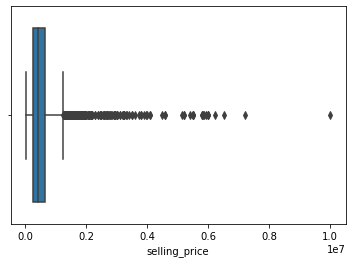

In [284]:
sns.boxplot(x=cp["selling_price"])

<AxesSubplot:xlabel='km_driven'>

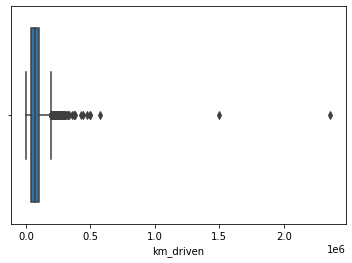

In [285]:
sns.boxplot(x=cp["km_driven"])

<AxesSubplot:xlabel='mileage'>

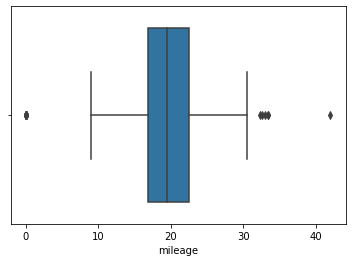

In [286]:
sns.boxplot(x=cp["mileage"])

<AxesSubplot:xlabel='engine'>

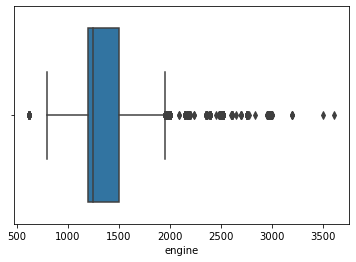

In [287]:
sns.boxplot(x=cp["engine"])

<AxesSubplot:xlabel='max_power'>

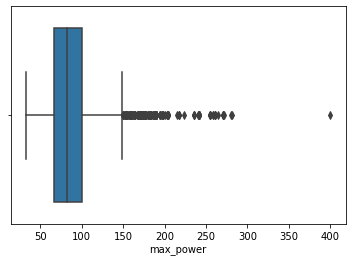

In [288]:
sns.boxplot(x=cp["max_power"])

<AxesSubplot:xlabel='age'>

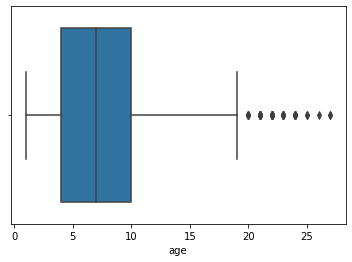

In [289]:
sns.boxplot(x=cp["age"])

* I removed the outliers based on boxplots

In [290]:
cp = cp[cp['selling_price'] < 3300000]

In [291]:
cp = cp[cp['km_driven'] < 300000]

In [292]:
cp = cp[(cp['mileage'] > 5) & (cp['mileage'] < 35)]

In [293]:
cp = cp[cp['max_power'] < 300]

# Exploratory Data Analysis Pt.1 Univariate


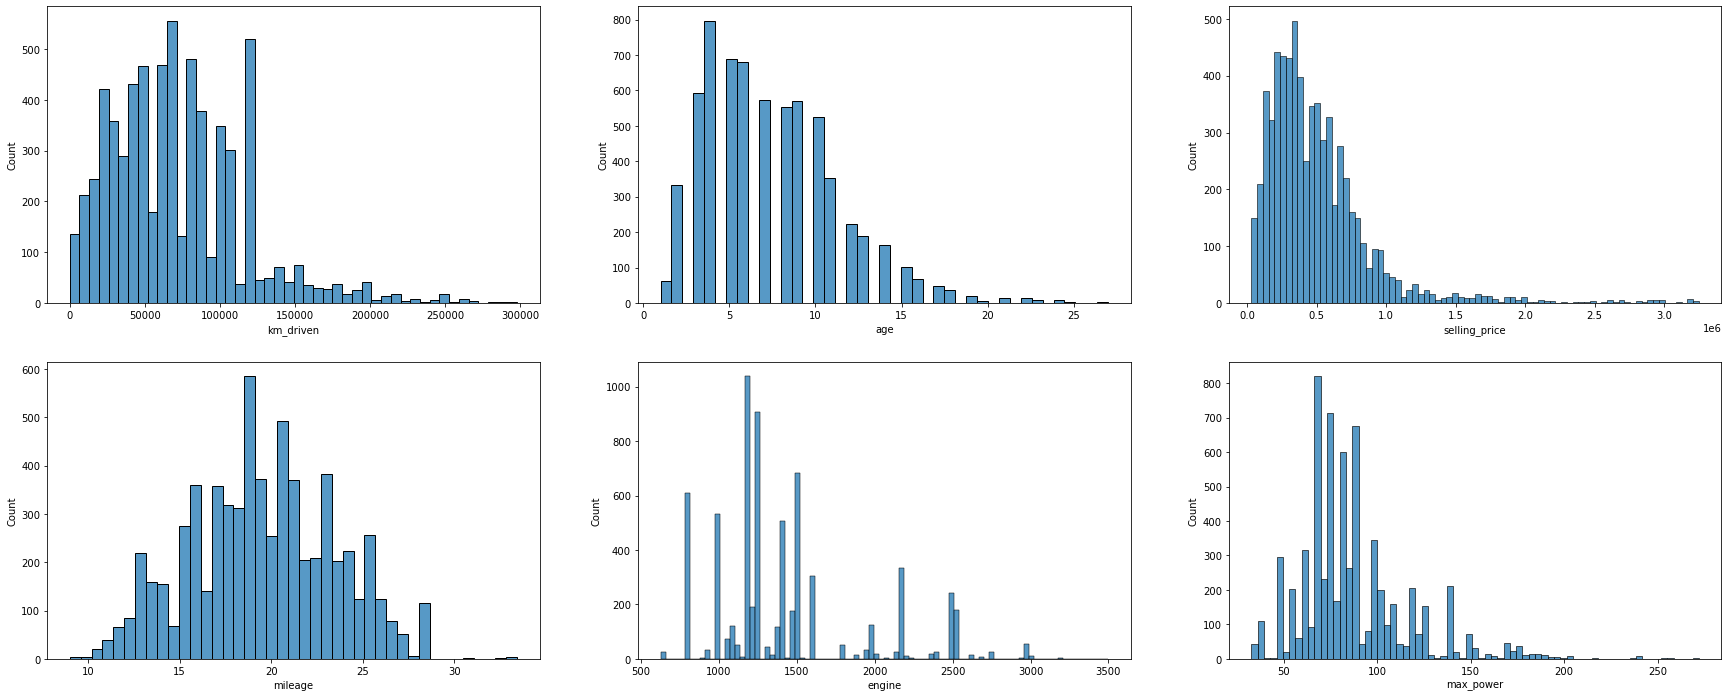

In [294]:
plt.figure(figsize=[30,12])
plt.subplot(2,3,1)
sns.histplot(x=cp["km_driven"],data=cp)
plt.subplot(2,3,2)
sns.histplot(x=cp["age"],data=cp)
plt.subplot(2,3,3)
sns.histplot(x=cp["selling_price"],data=cp)
plt.subplot(2,3,4)
sns.histplot(x=cp["mileage"],data=cp)
plt.subplot(2,3,5)
sns.histplot(x=cp["engine"],data=cp)
plt.subplot(2,3,6)
sns.histplot(x=cp["max_power"],data=cp)
plt.show()

From the histograms above, we can see the 'selling_price', 'km_driven', 'max_power' and 'age' plots look like a positively-skewed distribution, while 'mileage' look somewhat like a normal curve and 'engine' does not look like to follow a certain distribution.

Text(0, 0.5, 'Avg Price')

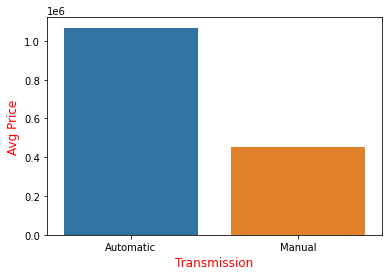

In [295]:
df1 = cp.groupby('transmission').agg({'selling_price':'sum','transmission':'count'})
df1['avg'] = (df1.selling_price / df1.transmission).astype(dtype=np.int32)
sns.barplot(x=df1.index,y=df1.avg,data=df1)
plt.xlabel('Transmission' , size=12 , color='red')
plt.ylabel('Avg Price' , size=12, color='red')


Text(0, 0.5, 'Avg Price')

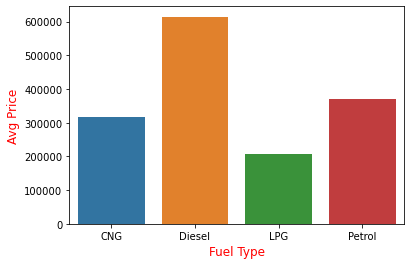

In [296]:
df1 = cp.groupby('fuel').agg({'selling_price':'sum','fuel':'count'})
df1['avg'] = (df1.selling_price / df1.fuel).astype(dtype=np.int32)
sns.barplot(x=df1.index,y=df1.avg,data=df1)
plt.xlabel('Fuel Type' , size=12 , color='red')
plt.ylabel('Avg Price' , size=12, color='red')

Text(0, 0.5, 'Avg Price')

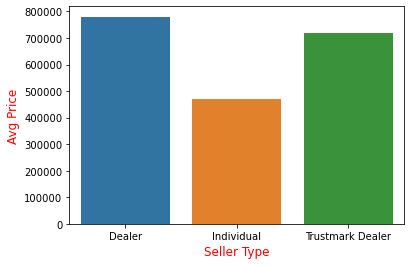

In [297]:
df1 = cp.groupby('seller_type').agg({'selling_price':'sum','seller_type':'count'})
df1['avg'] = (df1.selling_price / df1.seller_type).astype(dtype=np.int32)
sns.barplot(x=df1.index,y=df1.avg,data=df1)
plt.xlabel('Seller Type' , size=12 , color='red')
plt.ylabel('Avg Price' , size=12, color='red')

Text(0, 0.5, 'Avg Price')

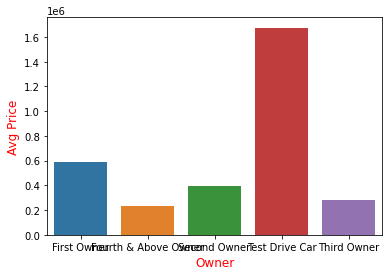

In [298]:
df1 = cp.groupby('owner').agg({'selling_price':'sum','owner':'count'})
df1['avg'] = (df1.selling_price / df1.owner).astype(dtype=np.int32)
sns.barplot(x=df1.index,y=df1.avg,data=df1)
plt.xlabel('Owner' , size=12 , color='red')
plt.ylabel('Avg Price' , size=12, color='red')

* As we can see automatic cars on average are more expensive
* Diesel is the most expensive fuel type
* Individual sellers sells cheaper than dealers on average
* First owner cars are more expensive than the other ones,Test drive cars average price is very high but this is also due to number being so low.

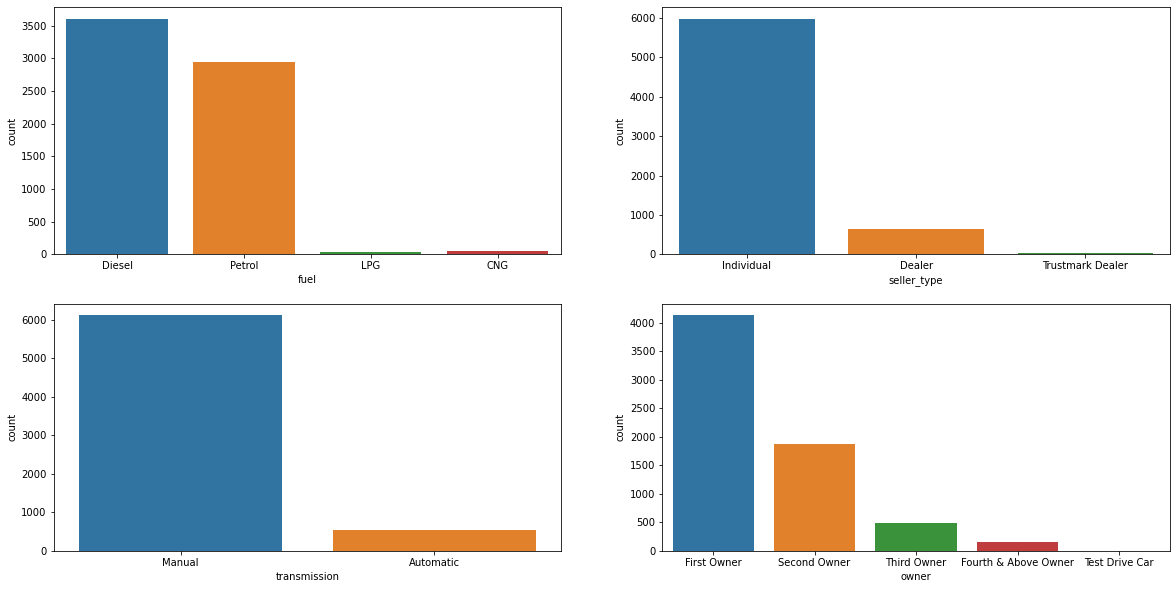

In [299]:
import warnings
warnings.filterwarnings('ignore') #I was getting warnings so I found this on Internet.
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.countplot(cp.fuel)
plt.subplot(2,2,2)
sns.countplot(cp.seller_type)
plt.subplot(2,2,3)
sns.countplot(cp.transmission)
plt.subplot(2,2,4)
sns.countplot(cp.owner)
plt.show()

* LPG and CNG examples are very low and I will remove them because they are using different metric than diesel and petrol in mileage metric,diesel and petrol uses km/l,cng and lpg uses km/kg

# 7.Exploratory Data Analysis Pt2.Multivariate(Correlations and Summary Statistics)

In [300]:
cp.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,age
count,6.639000e+03,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000
mean,5.017688e+05,72036.533815,19.544636,1422.557162,87.000567,5.433047,7.397048
std,3.914969e+05,45076.826596,3.922535,485.248152,30.065849,0.979143,3.894732
min,2.999900e+04,1.000000,9.000000,624.000000,32.800000,4.000000,1.000000
25%,2.500000e+05,38513.000000,16.840000,1197.000000,67.100000,5.000000,4.000000
50%,4.150000e+05,68697.000000,19.620000,1248.000000,81.830000,5.000000,7.000000
75%,6.400000e+05,100000.000000,22.540000,1498.000000,99.000000,5.000000,10.000000
max,3.251000e+06,298000.000000,33.440000,3498.000000,272.000000,14.000000,27.000000


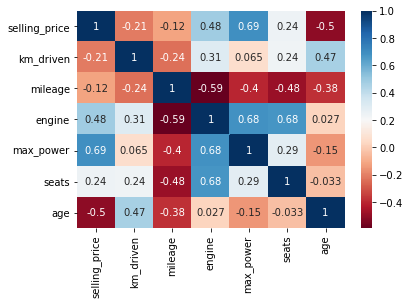

In [301]:
sns.heatmap(cp.corr(), annot=True, cmap="RdBu")
plt.show()

* As we can see from the heatmap max power and selling price has high correlation,and age and selling price seems to be negatively correlated,which is reasonable,because price drops when the car gets old


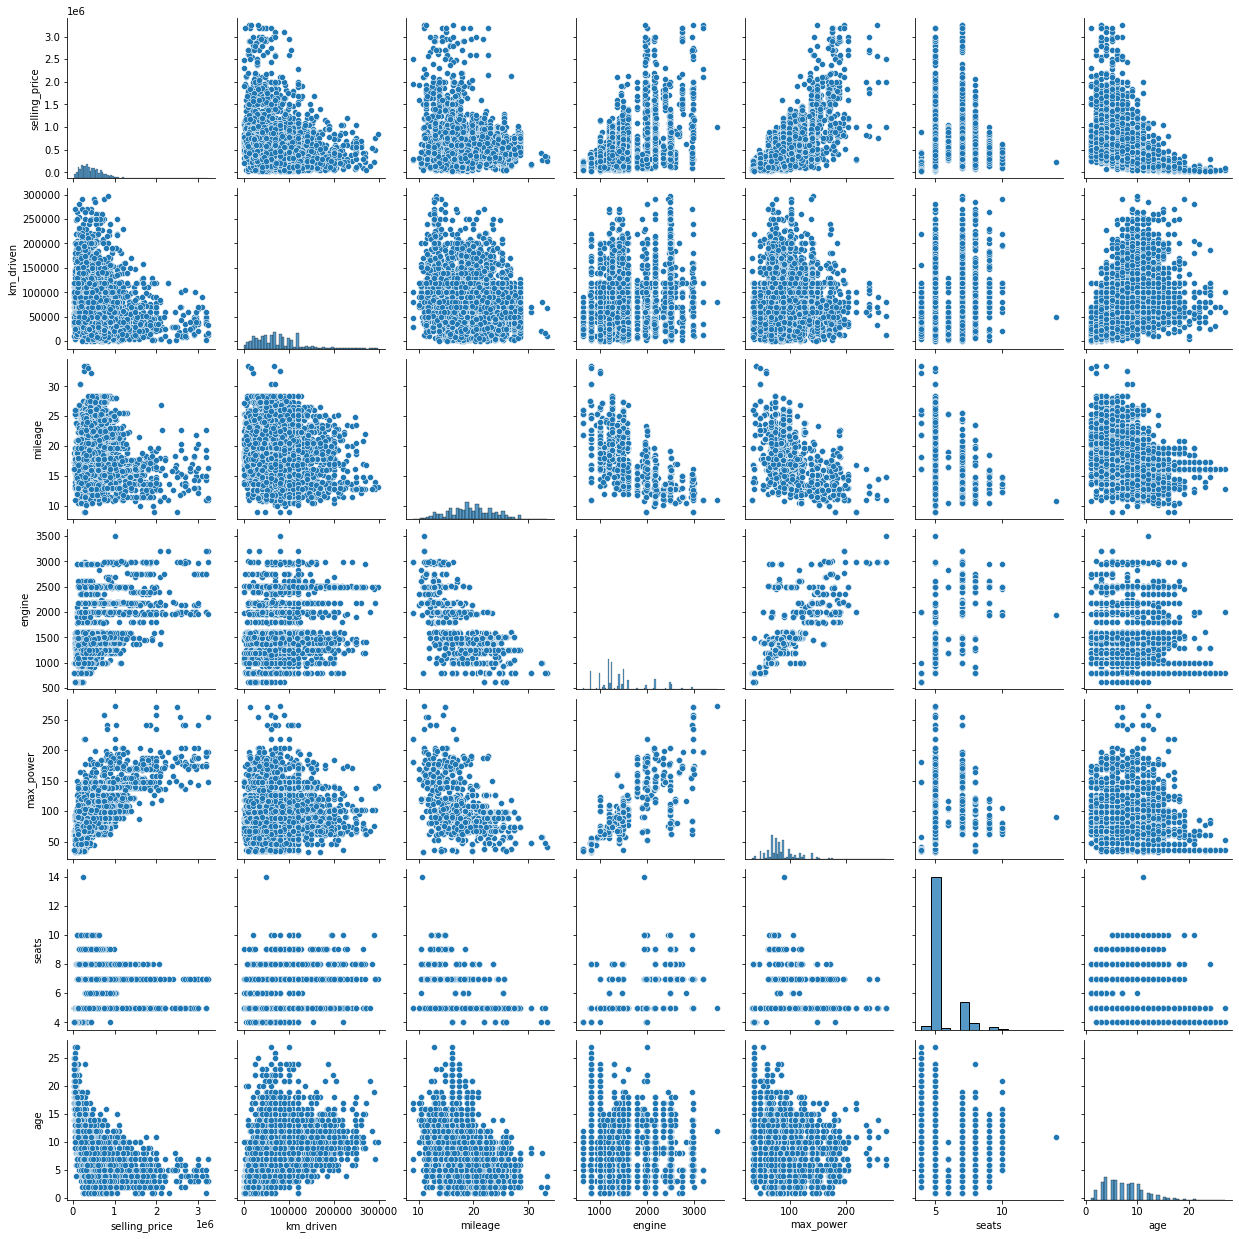

In [302]:
sns.pairplot(cp)

# 8.Feature Engineering and Converting Categorical Data

* Name - Name of  the car is one of the important pieces,think about it,if everything was equal including price,would you pick BMW or Opel?I just used brand names and removed the model names from this feature.
* Fuel - I will remove the CNG and LPG fuelled car since their 'mileage' metric is measured in 'km/kg' while the petrol and diesel vechiles 'mileage' are measured in 'km/l'. Also, CNG and LPG fuelled car are of very small sample size.
* KM - This part had outliers after 300.000 so I removed them
* Selling_Price This part outliers after 33 Million Rupee so I removed the outliers
* Mileage - This part had outliers when mileage <5 and mileage >35 so I removed both of them
* Max-Power This part had outliers when BHP > 300 so I removed them

In [303]:
copycp = cp.copy() # I created this copy to use in my second model without brand names
cp['brand'] = cp['name'].str.split(' ').str.get(0)
cp.drop(['name'],axis=1,inplace=True)
cp['owner'] = cp['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,'Fourth & Above Owner': 4,'Test Drive Car':5})

In [304]:
cp = cp[~cp['fuel'].isin(['CNG','LPG'])]

In [305]:
cp.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7,Maruti
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7,Skoda
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15,Honda
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11,Hyundai
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14,Maruti


* Converting categorical data to numerical data for our analysis,I also converted Owner type which you can find above

In [306]:
cp=pd.get_dummies(data=cp,drop_first=True)

In [307]:
cp.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,450000,145500,1,23.40,1248,74.00,5.0,7,0,1,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,2,21.14,1498,103.52,5.0,7,0,1,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,3,17.70,1497,78.00,5.0,15,1,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,1,23.00,1396,90.00,5.0,11,0,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,1,16.10,1298,88.20,5.0,14,1,1,...,0,0,0,0,0,0,0,0,0,0


One last correlation map to see how it changes when we add categorical variables into the table

In [308]:
cp.corr()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
selling_price,1.000000,-0.210507,-0.276607,-0.115935,0.482014,0.691079,0.242468,-0.505767,-0.308133,-0.234018,...,0.238603,0.026495,-0.012993,-0.013730,-0.025228,0.023493,-0.128652,0.254321,-0.010769,0.096003
km_driven,-0.210507,1.000000,0.317989,-0.234696,0.312516,0.065883,0.239302,0.471520,-0.370322,0.143279,...,-0.024472,0.064220,0.001953,0.010399,-0.042708,0.051705,0.058978,0.180806,0.005938,-0.018570
owner,-0.276607,0.317989,1.000000,-0.193130,0.037309,-0.048623,0.004193,0.484499,-0.018835,0.157093,...,-0.006768,0.012798,-0.006694,0.025289,-0.055619,0.011445,0.000040,0.017070,0.024515,-0.008366
mileage,-0.115935,-0.234696,-0.193130,1.000000,-0.594393,-0.400317,-0.485230,-0.378168,-0.089927,-0.016946,...,-0.104787,-0.060140,0.002751,-0.020403,0.118084,-0.018771,-0.040737,-0.262317,0.000753,-0.031748
engine,0.482014,0.312516,0.037309,-0.594393,1.000000,0.680935,0.674822,0.028347,-0.534170,-0.055895,...,0.121681,0.072906,-0.000250,0.004340,-0.094280,0.040702,0.031993,0.376995,0.006447,0.028298
max_power,0.691079,0.065883,-0.048623,-0.400317,0.680935,1.000000,0.282969,-0.147733,-0.330121,-0.167540,...,0.231570,0.046646,-0.003893,-0.004248,-0.063867,0.055042,-0.011211,0.195588,0.049497,0.064219
seats,0.242468,0.239302,0.004193,-0.485230,0.674822,0.282969,1.000000,-0.033176,-0.360936,0.035153,...,-0.029477,0.023395,-0.047351,-0.005512,-0.044808,-0.039942,-0.009712,0.279077,-0.073026,-0.011026
age,-0.505767,0.471520,0.484499,-0.378168,0.028347,-0.147733,-0.033176,1.000000,0.050471,0.138658,...,0.013804,0.050370,-0.009613,0.049466,-0.098993,0.021023,0.041799,0.026808,-0.016306,-0.010425
fuel_Petrol,-0.308133,-0.370322,-0.018835,-0.089927,-0.534170,-0.330121,-0.360936,0.050471,1.000000,0.013082,...,-0.027237,-0.037096,-0.005429,0.013654,0.025097,-0.048250,-0.112960,-0.135460,-0.055733,-0.022358
seller_type_Individual,-0.234018,0.143279,0.157093,-0.016946,-0.055895,-0.167540,0.035153,0.138658,0.013082,1.000000,...,-0.062438,-0.010940,0.001907,0.004148,-0.000376,-0.039682,0.063176,-0.054900,-0.024348,-0.032652


In [309]:
X = cp.drop(['selling_price'],axis=1)
y = cp[['selling_price']]

# 9.Training ML Model 1(With Brand Names)

* Splitting test and train data

In [310]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [311]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nums = ['km_driven', 'mileage', 'engine', 'max_power', 'age']
X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

In [312]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (5243, 40)
X_test shape (1311, 40)
y_train shape (5243, 1)
y_test shape (1311, 1)


In [313]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [314]:
lr = LinearRegression()

In [315]:
lr.fit(X_train,y_train)

LinearRegression()

In [316]:
y_pred = lr.predict(X_test)

# 10.1 Evaluating the Model 1

In [317]:
r2score = r2_score(y_test, y_pred)
r2score

0.7619135210994513

In [318]:
mse = mean_squared_error(y_test,y_pred)
mse

34867345348.00911

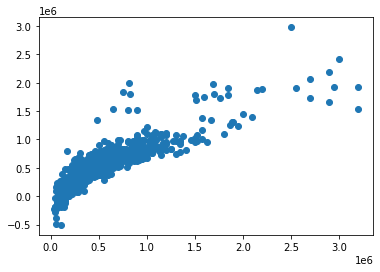

In [319]:
plt.scatter(y_test,y_pred)

# 9.1 Training ML Model 2 (Without Brand Names)

In [320]:
copycp = copycp[~copycp['fuel'].isin(['CNG','LPG'])]
copycp=pd.get_dummies(copycp,columns=['fuel','transmission','seller_type'],drop_first=True)
copycp.drop(['name'],axis=1,inplace=True)


In [321]:
copycp['owner'] = copycp['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,'Fourth & Above Owner': 4,'Test Drive Car':5})

In [322]:
copycp.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,145500,1,23.40,1248,74.00,5.0,7,0,1,1,0
1,370000,120000,2,21.14,1498,103.52,5.0,7,0,1,1,0
2,158000,140000,3,17.70,1497,78.00,5.0,15,1,1,1,0
3,225000,127000,1,23.00,1396,90.00,5.0,11,0,1,1,0
4,130000,120000,1,16.10,1298,88.20,5.0,14,1,1,1,0


In [323]:
X = copycp.drop(['selling_price'],axis=1)
y = copycp[['selling_price']]


In [324]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [325]:
scaler = StandardScaler()
nums = ['km_driven', 'mileage', 'engine', 'max_power', 'age']
X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

In [326]:
lr = LinearRegression()

In [327]:
lr.fit(X_train,y_train)

LinearRegression()

In [328]:
y_pred = lr.predict(X_test)

In [329]:
r2score = r2_score(y_test, y_pred)
r2score

0.6960931369732882

In [330]:
mse = mean_squared_error(y_test,y_pred)
mse

44506624633.6849

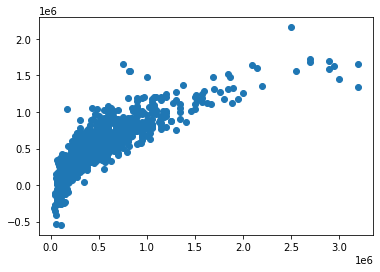

In [331]:
plt.scatter(y_test,y_pred)

In [1]:
import numpy as np
import random
sample_mean = []
 
for i in range(50):
  y = random.sample(x.tolist(), 4)
  avg = np.mean(y)
  sample_mean.append(avg)

NameError: name 'x' is not defined